In [27]:
from urllib.request import urlopen
html=urlopen(
    "https://mofanpy.com/static/scraping/basic-structure.html"
).read().decode('utf-8')
print(html)

<!DOCTYPE html>
<html lang="cn">
<head>
	<meta charset="UTF-8">
	<title>Scraping tutorial 1 | 莫烦Python</title>
	<link rel="icon" href="/static/img/description/tab_icon.png">
</head>
<body>
	<h1>爬虫测试1</h1>
	<p>
		这是一个在 <a href="/">莫烦Python</a>
		<a href="/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	</p>

</body>
</html>


In [31]:
import re
res= re.findall(r"<title>(.+?)</title>",html)
print("\npage title is",res[0])


page title is Scraping tutorial 1 | 莫烦Python


In [35]:
res = re.findall(r"<p>(.*?)</p>", html, flags=re.DOTALL)    # re.DOTALL if multi line
print("\nPage paragraph is: ", res[0])


Page paragraph is:  
		这是一个在 <a href="/">莫烦Python</a>
		<a href="/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	


In [36]:
res = re.findall(r'href="(.*?)"', html)
print("\nAll links: ", res)


All links:  ['/static/img/description/tab_icon.png', '/', '/tutorials/data-manipulation/scraping/']


In [38]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

html=urlopen(
    "https://mofanpy.com/static/scraping/basic-structure.html"
).read().decode('utf-8')
print(html)

<!DOCTYPE html>
<html lang="cn">
<head>
	<meta charset="UTF-8">
	<title>Scraping tutorial 1 | 莫烦Python</title>
	<link rel="icon" href="/static/img/description/tab_icon.png">
</head>
<body>
	<h1>爬虫测试1</h1>
	<p>
		这是一个在 <a href="/">莫烦Python</a>
		<a href="/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	</p>

</body>
</html>


In [45]:
soup = BeautifulSoup(html, features='lxml')
print(soup.head)

<head>
<meta charset="utf-8"/>
<title>Scraping tutorial 1 | 莫烦Python</title>
<link href="/static/img/description/tab_icon.png" rel="icon"/>
</head>


In [46]:
print(soup.h1)

<h1>爬虫测试1</h1>


In [47]:
print(soup.p)

<p>
		这是一个在 <a href="/">莫烦Python</a>
<a href="/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	</p>


In [52]:
all_href = soup.find_all('a')
print(all_href)

[<a href="/">莫烦Python</a>, <a href="/tutorials/data-manipulation/scraping/">爬虫教程</a>]


In [53]:
for l in all_href:
    print(l['href'])

/
/tutorials/data-manipulation/scraping/


In [50]:
## another way

all_href = soup.find_all('a')

all_href = [l['href'] for l in all_href]
print('\n', all_href)


 ['/', '/tutorials/data-manipulation/scraping/']


In [54]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

html = urlopen("https://mofanpy.com/static/scraping/list.html").read().decode('utf-8')
print(html)

<!DOCTYPE html>
<html lang="cn">
<head>
	<meta charset="UTF-8">
	<title>爬虫练习 列表 class | 莫烦 Python</title>
	<style>
	.jan {
		background-color: yellow;
	}
	.feb {
		font-size: 25px;
	}
	.month {
		color: red;
	}
	</style>
</head>

<body>

<h1>列表 爬虫练习</h1>

<p>这是一个在 <a href="/" >莫烦 Python</a> 的 <a href="/tutorials/data-manipulation/scraping/" >爬虫教程</a>
	里无敌简单的网页, 所有的 code 让你一目了然, 清晰无比.</p>

<ul>
	<li class="month">一月</li>
	<ul class="jan">
		<li>一月一号</li>
		<li>一月二号</li>
		<li>一月三号</li>
	</ul>
	<li class="feb month">二月</li>
	<li class="month">三月</li>
	<li class="month">四月</li>
	<li class="month">五月</li>
</ul>

</body>
</html>


In [55]:
soup= BeautifulSoup(html,features='lxml')

month=soup.find_all('li',{'class','month'})
print(month)

[<li class="month">一月</li>, <li class="feb month">二月</li>, <li class="month">三月</li>, <li class="month">四月</li>, <li class="month">五月</li>]


In [56]:
for m in month:
    print(m.get_text())

一月
二月
三月
四月
五月


In [57]:
jan = soup.find('ul', {"class": 'jan'})
print(jan)

d_jan = jan.find_all('li')              # use jan as a parent
for d in d_jan:
    print(d.get_text())

<ul class="jan">
<li>一月一号</li>
<li>一月二号</li>
<li>一月三号</li>
</ul>
一月一号
一月二号
一月三号


In [59]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

html = urlopen("https://mofanpy.com/static/scraping/table.html").read().decode('utf-8')
print(html)

<!DOCTYPE html>
<html lang="cn">
<head>
	<meta charset="UTF-8">
	<title>爬虫练习 表格 table | 莫烦 Python</title>

	<style>
	img {
		width: 250px;
	}
	table{
		width:50%;
	}
	td{
		margin:10px;
		padding:15px;
	}
	</style>
</head>
<body>

<h1>表格 爬虫练习</h1>

<p>这是一个在 <a href="/" >莫烦 Python</a> 的 <a href="/tutorials/data-manipulation/scraping/" >爬虫教程</a>
	里无敌简单的网页, 所有的 code 让你一目了然, 清晰无比.</p>

<br>
<table id="course-list">
	<tr>
		<th>
			分类
		</th><th>
			名字
		</th><th>
			时长
		</th><th>
			预览
		</th>
	</tr>

	<tr id="course1" class="ml">
		<td>
			机器学习
		</td><td>
			<a href="/tutorials/machine-learning/tensorflow/">
				Tensorflow 神经网络</a>
		</td><td>
			2:00
		</td><td>
			<img src="/static/img/course_cover/tf.jpg">
		</td>
	</tr>

	<tr id="course2" class="ml">
		<td>
			机器学习
		</td><td>
			<a href="/tutorials/machine-learning/reinforcement-learning/">
				强化学习</a>
		</td><td>
			5:00
		</td><td>
			<img src="/static/img/course_cover/rl.jpg">
		</td>
	</tr>

	<tr id="course3" class="data">
		<

In [62]:
soup= BeautifulSoup(html,features="lxml")
image_link= soup.find_all("img",{"src": re.compile('.*?\.jpg')})
for link in image_link:
    print(link["src"])

/static/img/course_cover/tf.jpg
/static/img/course_cover/rl.jpg
/static/img/course_cover/scraping.jpg


In [73]:
soup= BeautifulSoup(html,features="lxml")
course_links = soup.find_all('a', {'href': re.compile('/tutorials.*')})
for link in course_links:
    print(link['href'])

/tutorials/data-manipulation/scraping/
/tutorials/machine-learning/tensorflow/
/tutorials/machine-learning/reinforcement-learning/
/tutorials/data-manipulation/scraping/


In [75]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import random

base_url = "https://baike.baidu.com"
his = ["/item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711"]

In [76]:
url = base_url + his[-1]

html = urlopen(url).read().decode('utf-8')
soup = BeautifulSoup(html, features='lxml')
print(soup.find('h1').get_text(), '    url: ', his[-1])

网络爬虫     url:  /item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711


In [77]:
sub_urls = soup.find_all("a", {"target": "_blank", "href": re.compile("/item/(%.{2})+$")})

print(sub_urls)

[<a href="/item/%E4%B8%87%E7%BB%B4%E7%BD%91" target="_blank">万维网</a>, <a href="/item/%E7%BD%91%E7%BB%9C%E6%8B%93%E6%89%91" target="_blank">网络拓扑</a>, <a href="/item/%E7%BD%91%E7%BB%9C" target="_blank">网络</a>, <a href="/item/%E4%B8%87%E7%BB%B4%E7%BD%91" target="_blank">万维网</a>, <a href="/item/%E6%90%9C%E7%B4%A2%E5%BC%95%E6%93%8E" target="_blank">搜索引擎</a>, <a href="/item/%E9%80%9A%E7%94%A8%E6%90%9C%E7%B4%A2%E5%BC%95%E6%93%8E" target="_blank">通用搜索引擎</a>, <a href="/item/%E7%BD%91%E7%BB%9C%E6%95%B0%E6%8D%AE" target="_blank">网络数据</a>, <a href="/item/%E4%B8%87%E7%BB%B4%E7%BD%91" target="_blank">万维网</a>, <a href="/item/%E7%BD%91%E7%BB%9C%E6%8A%80%E6%9C%AF" target="_blank">网络技术</a>, <a href="/item/%E9%80%9A%E7%94%A8%E6%90%9C%E7%B4%A2%E5%BC%95%E6%93%8E" target="_blank">通用搜索引擎</a>, <a href="/item/%E5%85%B3%E9%94%AE%E5%AD%97" target="_blank">关键字</a>, <a href="/item/%E4%B8%87%E7%BB%B4%E7%BD%91" target="_blank">万维网</a>, <a href="/item/%E6%90%9C%E7%B4%A2%E5%BC%95%E6%93%8E" target="_blank">搜索引擎</a>, <a

In [78]:
if len(sub_urls) != 0:
    his.append(random.sample(sub_urls, 1)[0]['href'])
else:
    # no valid sub link found
    his.pop()
print(his)

['/item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711', '/item/%E7%BD%91%E7%BB%9C%E7%AE%A1%E7%90%86%E5%91%98']


In [79]:
his = ["/item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711"]

for i in range(20):
    url = base_url + his[-1]

    html = urlopen(url).read().decode('utf-8')
    soup = BeautifulSoup(html, features='lxml')
    print(i, soup.find('h1').get_text(), '    url: ', his[-1])

    # find valid urls
    sub_urls = soup.find_all("a", {"target": "_blank", "href": re.compile("/item/(%.{2})+$")})

    if len(sub_urls) != 0:
        his.append(random.sample(sub_urls, 1)[0]['href'])
    else:
        # no valid sub link found
        his.pop()

0 网络爬虫     url:  /item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711
1 深度优先策略     url:  /item/%E6%B7%B1%E5%BA%A6%E4%BC%98%E5%85%88%E7%AD%96%E7%95%A5
2 网络爬虫     url:  /item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB
3 镜像     url:  /item/%E9%95%9C%E5%83%8F
4 重命名     url:  /item/%E9%87%8D%E5%91%BD%E5%90%8D
5 镜像     url:  /item/%E9%95%9C%E5%83%8F
6 源文件     url:  /item/%E6%BA%90%E6%96%87%E4%BB%B6
7 查毒     url:  /item/%E6%9F%A5%E6%AF%92
8 主引导区     url:  /item/%E4%B8%BB%E5%BC%95%E5%AF%BC%E5%8C%BA
9 扇区     url:  /item/%E6%89%87%E5%8C%BA
10 扇区数     url:  /item/%E6%89%87%E5%8C%BA%E6%95%B0
11 磁头数     url:  /item/%E7%A3%81%E5%A4%B4%E6%95%B0
12 硬盘磁头     url:  /item/%E7%A1%AC%E7%9B%98%E7%A3%81%E5%A4%B4
13 密度     url:  /item/%E5%AF%86%E5%BA%A6
14 煤油     url:  /item/%E7%85%A4%E6%B2%B9
15 烷烃     url:  /item/%E7%83%B7%E7%83%83
16 偶极矩     url:  /item/%E5%81%B6%E6%9E%81%E7%9F%A9
17 物理学     url:  /item/%E7%89%A9%E7%90%86%E5%AD%A6
18 引力场     url:  /item/%E5%BC%95%E5%8A%9B%E5%9C%BA
19 物质运动     url:  /item/%E7%89%A9

In [85]:
data = {'firstname': 'vivien', 'lastname': 'li'}
r = requests.post('http://pythonscraping.com/pages/files/processing.php', data=data)
print(r.text)

Hello there, vivien li!


In [86]:
import os
os.makedirs('./img/', exist_ok=True)

IMAGE_URL = "https://mofanpy.com/static/img/description/learning_step_flowchart.png"

In [89]:
from urllib.request import urlretrieve
urlretrieve(IMAGE_URL, './img/image1.png')

('./img/image1.png', <http.client.HTTPMessage at 0x1a23d36240>)

In [93]:
IMAGE_URL = "https://mofanpy.com/static/img/description/learning_step_flowchart.png"

import requests
r = requests.get(IMAGE_URL)
with open('./img/image2.png', 'wb') as f:
    f.write(r.content)

KeyboardInterrupt: 

In [ ]:
r = requests.get(IMAGE_URL, stream=True)    # stream loading

with open('./img/image3.png', 'wb') as f:
    for chunk in r.iter_content(chunk_size=32):
        f.write(chunk)

In [94]:
import pandas as pd

dfs = pd.read_html('https://en.wikipedia.org/wiki/Pythonidae')

In [98]:
dfs[1]

,Pythonidae,Pythonidae.1
0,NaN,NaN
1,Indian python (Python molurus),Indian python (Python molurus)
2,Scientific classification,Scientific classification
3,Kingdom:,Animalia
4,Phylum:,Chordata
5,Class:,Reptilia
6,Order:,Squamata
7,Suborder:,Serpentes
8,Superfamily:,Pythonoidea
9,Family:,"PythonidaeFitzinger, 1826"


In [100]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

html=urlopen(
    "https://www.sephora.com/search?keyword=ysl"
).read()
print(html)


b'<!DOCTYPE html>\n<html lang="en" class="css-mao3d8" data-comp="Index "><head data-comp="Head "><title>Search | Sephora</title><script>(function(){(function(a){"use strict";function b(c,d){if({}.hasOwnProperty.call(b.cache,c))return b.cache[c];var e=b.resolve(c);if(!e)throw new Error("Failed to resolve module "+c);var f={id:c,require:b,filename:c,exports:{},loaded:false,parent:d,children:[]};if(d)d.children.push(f);var g=c.slice(0,c.lastIndexOf("/")+1);b.cache[c]=f.exports;e.call(void 0,f,f.exports,g,c);f.loaded=true;return b.cache[c]=f.exports}b.modules={};b.cache={};b.resolve=function(h){return{}.hasOwnProperty.call(b.modules,h)?b.modules[h]:void 0};b.define=function(i,j){b.modules[i]=j};b.define("1",function(k,l,m,n){var o=b("2",k);var p=o["default"];var q=String.fromCharCode.bind(String);function r(s){return q(8238)+s+q(8237)}var t=r("OTWHHWJgj");var u=r("rBCUgmpuw");var v="";var w="";var x=void 0;var y=Object.defineProperty.bind(Object);(function(){var z=XMLHttpRequest.prototype;

In [149]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

douban=urlopen(
    "https://movie.douban.com/top250"
).read()
print(douban)

b'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n\xe8\xb1\x86\xe7\x93\xa3\xe7\x94\xb5\xe5\xbd\xb1 Top 250\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <link rel="apple-touch-icon" href="https://img9.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img9.doubanio.com/f/shire/b8383160c4478308dcfd49d1363ebfffbb93a017/css/douban.css" rel="stylesheet" type="text/css">\n    <link href="https://img9.doubanio.com/f/shire/f1cf2b03de9dd8c9c233229c819fc1f

<ol class="grid_view">
        <li>
            <div class="item">
                <div class="pic">
                    <em class="">1</em>
                    <a href="https://movie.douban.com/subject/1292052/">
                        <img width="100" alt="肖申克的救赎" src="https://img9.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg" class="">
                    </a>
                </div>
                <div class="info">
                    <div class="hd">
                        <a href="https://movie.douban.com/subject/1292052/" class="">
                            <span class="title">肖申克的救赎</span>
                                    <span class="title">&nbsp;/&nbsp;The Shawshank Redemption</span>
                                <span class="other">&nbsp;/&nbsp;月黑高飞(港)  /  刺激1995(台)</span>
                        </a>


                            <span class="playable">[可播放]</span>
                    </div>
                    <div class="bd">
                        <p class="">
                            导演: 弗兰克·德拉邦特 Frank Darabont&nbsp;&nbsp;&nbsp;主演: 蒂姆·罗宾斯 Tim Robbins /...<br>
                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;犯罪 剧情
                        </p>

                        
                        <div class="star">
                                <span class="rating5-t"></span>
                                <span class="rating_num" property="v:average">9.7</span>
                                <span property="v:best" content="10.0"></span>
                                <span>2108546人评价</span>
                        </div>

                            <p class="quote">
                                <span class="inq">希望让人自由。</span>
                            </p>
                    </div>
                </div>
            </div>
        </li>
        <li>
            <div class="item">
                <div class="pic">
                    <em class="">2</em>
                    <a href="https://movie.douban.com/subject/1291546/">
                        <img width="100" alt="霸王别姬" src="https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg" class="">
                    </a>
                </div>
                <div class="info">
                    <div class="hd">
                        <a href="https://movie.douban.com/subject/1291546/" class="">
                            <span class="title">霸王别姬</span>
                                <span class="other">&nbsp;/&nbsp;再见，我的妾  /  Farewell My Concubine</span>
                        </a>


                            <span class="playable">[可播放]</span>
                    </div>
                    <div class="bd">
                        <p class="">
                            导演: 陈凯歌 Kaige Chen&nbsp;&nbsp;&nbsp;主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...<br>
                            1993&nbsp;/&nbsp;中国大陆 中国香港&nbsp;/&nbsp;剧情 爱情 同性
                        </p>

                        
                        <div class="star">
                                <span class="rating5-t"></span>
                                <span class="rating_num" property="v:average">9.6</span>
                                <span property="v:best" content="10.0"></span>
                                <span>1563422人评价</span>
                        </div>

                            <p class="quote">
                                <span class="inq">风华绝代。</span>
                            </p>
                    </div>
                </div>
            </div>
        </li>
        <li>
            <div class="item">
                <div class="pic">
                    <em class="">3</em>
                    <a href="https://movie.douban.com/subject/1292720/">
                        <img width="100" alt="阿甘正传" src="https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2372307693.jpg" class="">
                    </a>
                </div>
                <div class="info">
                    <div class="hd">
                        <a href="https://movie.douban.com/subject/1292720/" class="">
                            <span class="title">阿甘正传</span>
                                    <span class="title">&nbsp;/&nbsp;Forrest Gump</span>
                                <span class="other">&nbsp;/&nbsp;福雷斯特·冈普</span>
                        </a>


                            <span class="playable">[可播放]</span>
                    </div>
                    <div class="bd">
                        <p class="">
                            导演: 罗伯特·泽米吉斯 Robert Zemeckis&nbsp;&nbsp;&nbsp;主演: 汤姆·汉克斯 Tom Hanks / ...<br>
                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;剧情 爱情
                        </p>

                        
                        <div class="star">
                                <span class="rating5-t"></span>
                                <span class="rating_num" property="v:average">9.5</span>
                                <span property="v:best" content="10.0"></span>
                                <span>1593685人评价</span>
                        </div>

                            <p class="quote">
                                <span class="inq">一部美国近现代史。</span>
                            </p>
                    </div>
                </div>
            </div>
        </li>
        <li>

In [162]:
soup= BeautifulSoup(douban,features="lxml")

title = soup.find("span", attrs={"class": "title"}).get_text()
print(title)
rating_num = soup.find("span", attrs={"class": "rating_num"}).getText()
print(rating_num)
inq = soup.find("span", attrs={"class": "inq"}).getText()
print(inq)
review=soup.find(text=re.compile('人评价$'))
print(review)


肖申克的救赎
9.7
希望让人自由。
2108546人评价


In [163]:
next_page = soup.find("span", attrs={"class":"next"}).find("a")
print(next_page)

<a href="?start=25&amp;filter=">后页&gt;</a>


In [230]:
import pandas as pd
import requests, re
from bs4 import BeautifulSoup

url = "https://movie.douban.com/top250"

def download_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")
    return soup

def parse_soup(soup):
    return_list = []
    # 利用 class 属性找到 grid
    grid = soup.find("ol", attrs={"class": "grid_view"})
    # 不加 attrs= 也可以
    # grid = soup.find("ol", {"class": "grid_view"})
    if grid:
        # 利用标签获取 list
        movie_list = grid.find_all("li")

        # 遍历 list
        for movie in movie_list:
            # 一个电影有多个名字，这里只取第一个
            title = movie.find("span", attrs={"class": "title"}).getText()
            rating_num = movie.find("span", attrs={"class": "rating_num"}).getText()
            inq = movie.find("span", attrs={"class": "inq"})
            # 利用 text 配合正则表达式匹配搜索文本
            rating_p = soup.find(text=re.compile('人评价$'))
            # 有些暂时没有一句话评论
            if not inq:
                inq = "暂无"
            else:
                inq = inq.getText()
            return_list.append(title + "，" + rating_p + "，评分：" + rating_num )

        next_page = soup.find("span", attrs={"class":"next"}).find("a")
        if next_page:
            return return_list, next_page["href"]
        else:
            return return_list, None

        
df=pd.DataFrame(parse_soup(soup)[0])
df=df[0].str.split("，", expand=True)
df


#df =pd.DataFrame (parse_soup(soup)[0],columns=['Movie'])
#df

,0,1,2
0,肖申克的救赎,2108546人评价,评分：9.7
1,霸王别姬,2108546人评价,评分：9.6
2,阿甘正传,2108546人评价,评分：9.5
3,这个杀手不太冷,2108546人评价,评分：9.4
4,泰坦尼克号,2108546人评价,评分：9.4
5,美丽人生,2108546人评价,评分：9.5
6,千与千寻,2108546人评价,评分：9.4
7,辛德勒的名单,2108546人评价,评分：9.5
8,盗梦空间,2108546人评价,评分：9.3
9,忠犬八公的故事,2108546人评价,评分：9.4


In [390]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

html=urlopen(
    "https://www.imdb.com/list/ls055592025/"
).read()
soup= BeautifulSoup(html,features='lxml')
h=soup.find_all("h3")
#print(h)
d=soup.find_all("div",{"class":"ipl-rating-star small"})
#print(d)
p=soup.find_all("span",{"name":"nv"})
#print(p)



name_list=[]
year_list=[]
rating_list=[]
gross_list=[]
for movie in h:
    title=movie.find("a")
    if title != None:
        name_list.append(title.get_text())
    year=movie.find("span",{"class":"lister-item-year text-muted unbold"})
    if year != None:
        year_list.append(year.get_text().strip('()'))

for movie_rating in d:
    r= movie_rating
    if r != None:
        rating_list.append(r.get_text().strip())

for gross in p:
    g = gross
   # money = ''.join((re.findall(r"\$[^ ]+",g)))
    #if money != "":
    gross_list.append(money)
    print(g)
#df=pd.DataFrame({"movie":name_list, "year":year_list, "rate":rating_list,"gross":gross_list})
#df
       

<span data-value="1567458" name="nv">1,567,458</span>
<span data-value="134,966,411" name="nv">$134.97M</span>
<span data-value="2272232" name="nv">2,272,232</span>
<span data-value="28,341,469" name="nv">$28.34M</span>
<span data-value="1179864" name="nv">1,179,864</span>
<span data-value="96,898,818" name="nv">$96.90M</span>
<span data-value="312824" name="nv">312,824</span>
<span data-value="23,383,987" name="nv">$23.38M</span>
<span data-value="508600" name="nv">508,600</span>
<span data-value="1,024,560" name="nv">$1.02M</span>
<span data-value="388231" name="nv">388,231</span>
<span data-value="1,585,634" name="nv">$1.59M</span>
<span data-value="283161" name="nv">283,161</span>
<span data-value="198,676,459" name="nv">$198.68M</span>
<span data-value="365810" name="nv">365,810</span>
<span data-value="2,076,020" name="nv">$2.08M</span>
<span data-value="888812" name="nv">888,812</span>
<span data-value="112,000,000" name="nv">$112.00M</span>
<span data-value="260762" name="nv">2

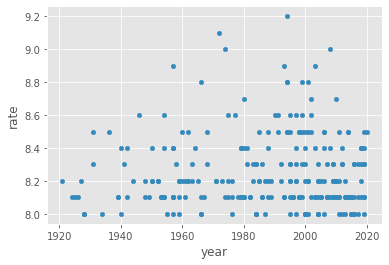

In [416]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.style.use('ggplot')

html=urlopen(
    "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
).read()
soup= BeautifulSoup(html,features='lxml')

movie=soup.find_all("td",{"class":"titleColumn"})
rating=soup.find_all('td',{"class":"ratingColumn imdbRating"})


name_list=[]
year_list=[]
score_list=[]
for m in movie:
    title=m.find("a").get_text()
    name_list.append(title)
    year=m.find("span").get_text().strip("()")
    year_list.append(year)
    
for r in rating:
    score=r.get_text().strip()
    score_list.append(score)

df=pd.DataFrame({"movie":name_list, "year":year_list, "rate":score_list})
df


df.year=pd.to_numeric(df.year)
df.rate=pd.to_numeric(df.rate)
df.plot("year","rate",kind="scatter")


In [417]:
#导入库-------------------------------------------
from urllib import request
from chardet import detect
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

#获取网页源码，生成soup对象-------------------------
def getSoup(url):
    with request.urlopen(url) as fp:
        byt = fp.read()
        det = detect(byt)
        time.sleep(random.randrange(1,5))
        return BeautifulSoup(byt.decode(det['encoding']),'lxml')

##解析数据-------------------------------------------  
def getData(soup):
   #获取评分
    ol = soup.find('tbody', attrs = {'class': 'lister-list'})
    score_info = ol.find_all('td',attrs={'class':'imdbRating'})
    film_scores = [k.text.replace('\n','') for k in score_info]
   #获取评分、电影名、导演・演员、上映年份、详情网页链接
    film_info = ol.find_all('td',attrs={'class':'titleColumn'})
    film_names =  [k.find('a').text for k in film_info]
    film_actors =  [k.find('a').attrs['title'] for k in film_info]
    film_years = [k.find('span').text[1:5] for k in film_info]
    next_nurl =  [url2 + k.find('a').attrs['href'][0:17]  for k in film_info]
    data=pd.DataFrame({'name':film_names,'year':film_years,'score':film_scores,'actors':film_actors,'newurl':next_nurl})      
    return data   

In [418]:
#获取详情页数据-------------------------------------------
def nextUrl(detail,detail1):
  #获取电影国家
    detail_list = detail.find('div',attrs={'id':'titleDetails'}).find_all('div',attrs={'class':'txt-block'})
    detail_str = [k.text.replace('\n','') for k in detail_list]
    detail_str = [k for k in detail_str if k.find(':')>=0]
    detail_dict = {k.split(':')[0] : k.split(':')[1] for k in detail_str}
    country = detail_dict['Country']    
  #获取电影类型
    detail_list1 = detail.find('div',attrs={'class':'title_wrapper'}).find_all('div',attrs={'class':'subtext'})
    detail_str1 = [k.find('a').text for k in detail_list1]
    movie_type=pd.DataFrame({'Type':detail_str1})
  #获取以组划分的电影详细评分、人数
    div_list = detail1.find_all('td',attrs= {'align': 'center'}) 
    value = [k.find('div',attrs= {'class': 'bigcell'}).text.strip() for k in div_list]
    num   = [k.find('div', attrs={'class': 'smallcell'}).text.strip() for k in div_list]
    scores=pd.DataFrame({'value':value,'num':num})  
    return country,movie_type,scores

In [420]:
getData(getSoup("http://blog.itpub.net/31555699/viewspace-2636705/"))

AttributeError: 'NoneType' object has no attribute 'find_all'